load the libraries

![Project Image](relative_path_to_image)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Download the data

In [2]:
!pip install -q kaggle && mkdir -p ~/.kaggle && echo '{"username":"hiteshnawin","key":"c76e168c1d00f5da65f3849e9c0d63fc"}' > ~/.kaggle/kaggle.json && kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images


^C


Unzip the data

In [15]:
!unzip '/content/cifake-real-and-ai-generated-synthetic-images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential,functional
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

Populating the interactive namespace from numpy and matplotlib


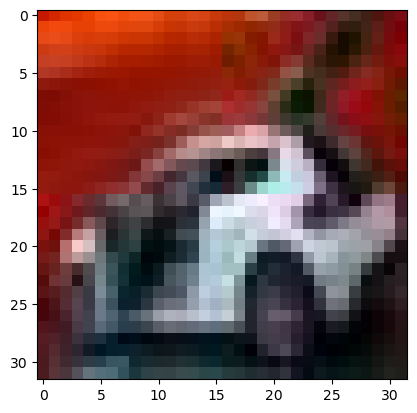

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(r'D:\Downloads\raw shadow pics\test\REAL\0000 (2).jpg')
imgplot = plt.imshow(img)
plt.show()

In [4]:
train_img_path = r'D:\Downloads\raw shadow pics\train'

test_img_path = r'D:\Downloads\raw shadow pics\test'


Define parameters for the training dataset

In [6]:
target_width,target_height = 32,32
batch_size = 32

Set up data generators

In [5]:
train_data_gen = ImageDataGenerator(
    rescale = 1.0/255
)
test_data_gen = ImageDataGenerator(rescale = 1.0/255)

 Create the training dataset

In [9]:
train_Dataset = train_data_gen.flow_from_directory(
    train_img_path,
    target_size = (target_width,target_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 100000 images belonging to 2 classes.


 Create the testing dataset

In [7]:
test_Dataset = test_data_gen.flow_from_directory(
    test_img_path,
    target_size = (target_width ,target_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
)

Found 20000 images belonging to 2 classes.


In [10]:
class_indices = train_Dataset.class_indices
print(class_indices)


{'FAKE': 0, 'REAL': 1}


In [13]:
image_shape = train_Dataset.image_shape
print(image_shape)


(32, 32, 3)


# CNN Model

In [14]:
# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_width ,target_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

Save the best model

In [15]:

weight_path = r'D:\Downloads\raw shadow pics'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

Model Training

In [17]:
history = model.fit(train_Dataset,
                    epochs=15,
                    validation_data=test_Dataset,
                    callbacks=[model_checkpoint]
                   )

Epoch 1/15
3125/3125 [==============================] - 267s 86ms/step - loss: 0.3338 - accuracy: 0.8558 - val_loss: 0.2473 - val_accuracy: 0.8992
Epoch 2/15
3125/3125 [==============================] - 274s 88ms/step - loss: 0.2343 - accuracy: 0.9058 - val_loss: 0.2443 - val_accuracy: 0.9003
Epoch 3/15
3125/3125 [==============================] - 209s 67ms/step - loss: 0.1991 - accuracy: 0.9212 - val_loss: 0.2207 - val_accuracy: 0.9085
Epoch 4/15
3125/3125 [==============================] - 223s 71ms/step - loss: 0.1752 - accuracy: 0.9304 - val_loss: 0.1913 - val_accuracy: 0.9242
Epoch 5/15
3125/3125 [==============================] - 152s 49ms/step - loss: 0.1565 - accuracy: 0.9381 - val_loss: 0.1791 - val_accuracy: 0.9298
Epoch 6/15
3125/3125 [==============================] - 166s 53ms/step - loss: 0.1435 - accuracy: 0.9444 - val_loss: 0.1845 - val_accuracy: 0.9305
Epoch 7/15
3125/3125 [==============================] - 198s 63ms/step - loss: 0.1342 - accuracy: 0.9471 - val_loss: 0

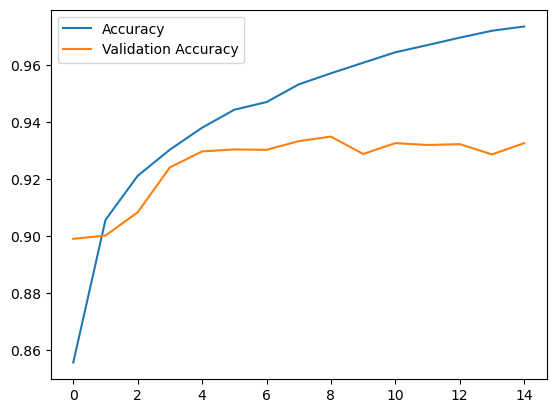

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

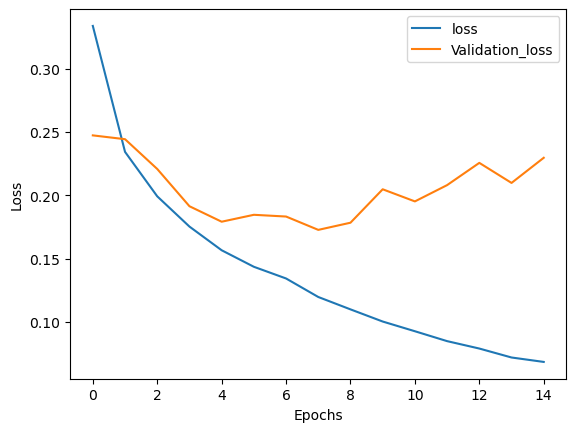

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [20]:
# load best weights to model
model.load_weights(weight_path)

# make prediction
predictions = model.predict(test_Dataset)

625/625 [==============================] - 15s 23ms/step


In [21]:
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img(r"D:\Downloads\raw shadow pics\test\REAL\0000 (2).jpg",target_size=(32,32))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [23]:
rslt = model.predict(img_pred)


1/1 [==============================] - 0s 120ms/step


In [24]:
if rslt[0][0]==1:
    prediction ="REAL"
else:
    prediction ="AI-Generated"
print('Prediction: ',prediction)

Prediction:  FAKE


In [25]:
from tensorflow.keras.models import load_model

# Assuming you have trained and compiled your model
# Replace 'model' with the name of your model
# For example, model.save('my_model.h5')

model.save('my_model.h5')


e:\an\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


pre defined model(VGG16)

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Load a pre-trained model (VGG16 in this case)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_width ,target_height, 3))

# Create a new model on top of the pre-trained model
model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
history_1 = model1.fit(train_Dataset,
                    epochs=1,
                    validation_data=test_Dataset,
                    callbacks=[model_checkpoint]
                   )

3125/3125 [==============================] - 8908s 3s/step - loss: 0.6935 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model1 = load_model('my_model.h5')

def predict_image(image_path, model):
    # Load the image
    img = cv2.imread(r"D:\Downloads\raw shadow pics\test\REAL\0000 (2).jpg")

    # Check if the image was successfully loaded
    if img is not None and not img.size == 0:
        # Resize the image to (32, 32) to match the model's input size
        img = cv2.resize(img, (32, 32))
        # Normalize the image
        img = img / 255.0
        # Add a batch dimension
        img = np.expand_dims(img, axis=0)
        
        # Make a prediction
        result = model.predict(img)
        
        # Check the prediction
        if result[0][0] >= 0.5:
            prediction = "REAL"
        else:
            prediction = "AI GENERATED"

        return prediction
    else:
        return "Failed to load or empty image"

# Specify the path to the image you want to predict
image_path = "/path/to/your/image.jpg"

# Call the predict_image function
prediction = predict_image(image_path, model1)
print("Prediction:", prediction)


1/1 [==============================] - 0s 132ms/step
Prediction: REAL


1/1 [==============================] - 0s 40ms/step


In [33]:
import gradio as gr
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load your trained model
model = load_model(r'D:\Downloads\raw shadow pics\my_model.h5')

def classify_image(image):
    # Preprocess the input image
    img = cv2.resize(image, (32, 32))  # Resize the image to match your model's input size
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add a batch dimension

    # Make a prediction
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = "REAL"
    else:
        prediction = "AI GENERATED"

    return prediction

# Define the interface with custom title, description, and style
iface = gr.Interface(
    fn=classify_image,  # Function for making predictions
    inputs="image",  # Input type is an image
    outputs="text",  # Output type is text
    title="Real vs AI-Generated Image Classifier",
    description="Upload an image to classify it as 'REAL' or 'AI GENERATED'",
    style="width: 400px; max-width: 100%; background-color: #e6f7ff; padding: 20px;"
)

# Launch the interface with sharing enabled
iface.launch(share=True)


C:\Users\HITESH\AppData\Local\Temp\ipykernel_14244\2129145054.py:25: GradioUnusedKwargWarning: You have unused kwarg parameters in Interface, please remove them: {'style': 'width: 400px; max-width: 100%; background-color: #e6f7ff; padding: 20px;'}
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: e:\an\lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: e:\an\lib\site-packages\gradio


In [42]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="dima806/ai_vs_real_image_detection")

In [56]:
pipe(r"D:\Downloads\WhatsApp Image 2023-11-06 at 12.11.50_5ce12e0b.jpg")

[{'score': 0.9657949209213257, 'label': 'FAKE'},
 {'score': 0.034205030649900436, 'label': 'REAL'}]

In [44]:
# Load model directly
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

extractor = AutoFeatureExtractor.from_pretrained("dima806/ai_vs_real_image_detection")
model2 = AutoModelForImageClassification.from_pretrained("dima806/ai_vs_real_image_detection")

e:\an\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [47]:
import torch

# Save the model
torch.save(model2.state_dict(), 'my_model.pth')


In [6]:
import gradio as gr
from transformers import pipeline
from PIL import Image
import tempfile
import numpy as np

# Load the image classification pipeline
pipe = pipeline("image-classification", model="dima806/ai_vs_real_image_detection")

# Define a Gradio interface
def classify_image(input_image):
    # Ensure the input image is a PIL image
    if isinstance(input_image, np.ndarray):
        input_image = Image.fromarray(input_image)

    # Create a temporary file to store the uploaded image
    with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as temp_img:
        input_image.save(temp_img, format="JPEG")

    # Perform image classification
    result = pipe(temp_img.name)

    # Extract the label and score from the result
    label = result[0]['label']
    score = result[0]['score']

    return f"Label: {label}, Score: {score:.2f}"

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.inputs.Image(),
    outputs="text",
    live=True,
    capture_session=True
)

# Launch the Gradio interface
iface.launch()


C:\Users\HITESH\AppData\Local\Temp\ipykernel_8624\904448158.py:32: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(),
C:\Users\HITESH\AppData\Local\Temp\ipykernel_8624\904448158.py:32: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(),
C:\Users\HITESH\AppData\Local\Temp\ipykernel_8624\904448158.py:30: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "e:\an\lib\site-packages\gradio\routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
  File "e:\an\lib\site-packages\gradio\blocks.py", line 1392, in process_api
    result = await self.call_function(
  File "e:\an\lib\site-packages\gradio\blocks.py", line 1097, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "e:\an\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "e:\an\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "e:\an\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "e:\an\lib\site-packages\gradio\utils.py", line 703, in wrapper
    response = f(*args, **kwargs)
  File "C:\Users\HITESH\AppData\Local\Temp\ipykernel_8624\904448158.py", line 1